In [36]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from math import exp

## **Problème 2** : Calibrations d'hyper-paramètres d'une regression de processus gaussien par maximum de vraissemblance.
# BLABLABLA RESUMER LE PROBLEME ICI


In [5]:
def cov_k(x0, x1, lambd = 1) :
    return (1+ ((x0 - x1)/lambd) + (((x0-x1)**2)/(3*(lambd**2)))) * exp(-((x0-x1)/lambd))

def compute_cov_sigma(x, lambd = 1) :
    return np.array([[cov_k(xi, xj, lambd) for xj in x] for xi in x])

### 1. Simulation de plusieurs réalisations d'un processus Gaussien de moyenne nulle et de fonction de covariance $k_1$
####    1.1. Moyenne et matrice de covariance du vecteur aléatoire $m + L^tG$
- Prenons $N$ valeurs équi-distribuées avec $x_i \in [0,1]$ tels que $x_1 < \dots < x_N$.
- Fixons $\lambda = 1$ et calculons $\Sigma$, la matrice de covariance 

In [113]:
N = 300

_out = True
if N > 50 :
    _out = False

lambd = 1

#To get N numbers evenly spread between 0 and 1, linspace() from numpy
xi = np.linspace(0, 1, N)
sigma = compute_cov_sigma(xi)

if(_out) :
    print("xi : ", xi.round(2))
    print("Sigma :")
    print(sigma.round(3))
else:
    print("xi and Sigma computed !")

xi and Sigma computed !


- Calculons $L$, la décomposition de Cholesky de $\Sigma$
- Prenons $G$, un vecteur de taille $N$ dont les valeurs sont des tirages aléatoires indépendants d'une loi Gausienne centrée réduite
- Notons $m = (m(x_1), \dots, m(x_N))$ (que l'on considère non nul uniquement pour cette question)

In [114]:
L = la.cholesky(sigma)

G = np.random.normal(0, 1, N)

m = xi

if _out :
    print("L :\n", L.round(2))
    print("G :\n", G.round(2))
    print("m :\n", m.round(2))
else :
    print("L, G and m computed !")

LinAlgError: Matrix is not positive definite

Avec ces élements, calculons le vecteur aléatoire *$m + L^tG$*, que nous noterons $v$ pour cette question.

Nous allons nous intéresser à la moyenne et la matrice de covariance de ce vecteur.

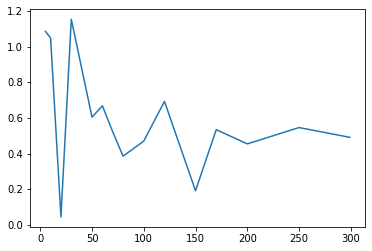

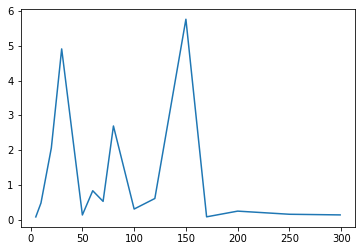

In [115]:
v = m + (L.T @ G)

ns = [5, 10, 20, 30, 50, 60, 70, 80, 100, 120, 150, 170, 200, 250, 299]
means = []
covs  = []

for n in ns :
    xi = np.linspace(0, 1, n)
    sigma = compute_cov_sigma(xi)
    L = la.cholesky(sigma)
    G = np.random.normal(0, 1, n)
    m = xi
    v = m + (L.T @ G)
    
    means.append(np.mean(v))
    covs.append(np.cov(v))
    

plt.figure("Means")
plt.plot(ns, means)

plt.figure("Covs")
plt.plot(ns, covs)


### 2. Estimation du paramètre $\lambda$ par maximum de vraissemblance